<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"></ul></div>

In [1]:
from apps.lib import Sensor, Performance, Model
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm

WHO = 7
SONG = 1
TRAIN_ORDER = 3

In [2]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [3]:
sensor_data = Sensor(verbose=1)

15:05:14 INFO << load arm CSV.
15:05:14 INFO << load drummer CSV.


In [4]:
def gogo(who_id, song_id, train_pf_order):
    train_pf = Performance(sensor_data, who_id, song_id, train_pf_order)
    
    pfs = []
    for pf_order in tqdm(range(1, 3 + 1)):
        if pf_order == train_pf_order:
            pfs.append(train_pf)
        else:
            pfs.append(Performance(sensor_data, 7, 1, pf_order)) 
            
    return pfs

In [5]:
pfs = gogo(WHO, SONG, TRAIN_ORDER)

100%|██████████| 3/3 [00:46<00:00, 15.57s/it]


In [6]:
# pf.plot_global_event()

In [7]:
for i in range(len(pfs)):
    print(pfs[i].primitive_df)

         L_AAI         L_AVI    L_ASMA      L_GAI     L_GVI   L_GSMA  \
0     0.337924  2.369709e-05  0.567000  13.844102  0.008371  23.3420   
1     0.359329  7.733747e-07  0.604000  11.557181  0.044843  14.6485   
2     0.353843  3.472095e-07  0.590000  14.703764  3.050871  24.7120   
3     0.325767  8.594093e-05  0.538000  20.979637  1.690784  30.9480   
4     0.302439  5.574074e-05  0.492000  22.791887  1.355889  34.0580   
5     0.278878  0.000000e+00  0.451000  16.328792  0.000000  26.0240   
6     0.266627  0.000000e+00  0.428000   9.238087  0.000000  15.9000   
7     0.278468  2.027087e-05  0.461500   4.047039  0.547172   6.4315   
8     0.299695  0.000000e+00  0.503000   8.795837  0.000000  13.2830   
9     0.286575  2.348403e-05  0.480500   6.023644  0.017199   9.0745   
10    0.287299  0.000000e+00  0.489000   6.314247  0.000000   9.9560   
11    0.302435  0.000000e+00  0.515000   4.666256  0.000000   6.5980   
12    0.290187  9.519223e-05  0.495500   3.250584  0.740674   5.

In [8]:
model = Model(k_centroid=100)
model.fit(pfs[TRAIN_ORDER - 1])

[[1.13008723e-01 0.00000000e+00 1.44563919e-01 ... 1.25747807e-02
  1.09487726e-02 2.26720896e-04]
 [1.16333911e-01 0.00000000e+00 1.54121864e-01 ... 1.63404387e-02
  8.35089064e-03 3.05049574e-04]
 [1.12861637e-01 5.07567983e-05 1.47849462e-01 ... 4.25693597e-02
  4.92267579e-03 1.99954177e-03]
 ...
 [1.08334016e-01 2.54585129e-04 1.19175627e-01 ... 7.07004705e-02
  3.89576788e-02 5.23012765e-03]
 [1.14581969e-01 1.15464006e-05 1.25448029e-01 ... 7.03858589e-02
  4.12527253e-02 5.35382921e-03]
 [1.16506020e-01 0.00000000e+00 1.32915173e-01 ... 7.30261757e-02
  3.33790037e-02 5.04129732e-03]]


100%|██████████| 361/361 [01:43<00:00,  3.49it/s]


In [9]:
def cutstom_output_cnf_matrix(y, pred_y):
    cnf_matrix = confusion_matrix(y, pred_y)
    
    # Plot normalized confusion matrix
    plt.figure(figsize=(10, 10))
    plot_confusion_matrix(cnf_matrix, classes=[0, 1, 2, 3, 5, 6], normalize=True,
                          title='Normalized confusion matrix')
    plt.show()

predicting 1 performance


100%|██████████| 361/361 [01:43<00:00,  3.47it/s]
15:09:52 DEBUG << findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('/usr/bin/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
15:09:52 DEBUG << findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/usr/bin/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000


============ prediction arm ============
Normalized confusion matrix
[[0.3625     0.59166667 0.         0.         0.04583333 0.        ]
 [0.32467532 0.67532468 0.         0.         0.         0.        ]
 [0.33333333 0.66666667 0.         0.         0.         0.        ]
 [0.25       0.25       0.         0.         0.5        0.        ]
 [0.24       0.04       0.         0.         0.72       0.        ]
 [1.         0.         0.         0.         0.         0.        ]]


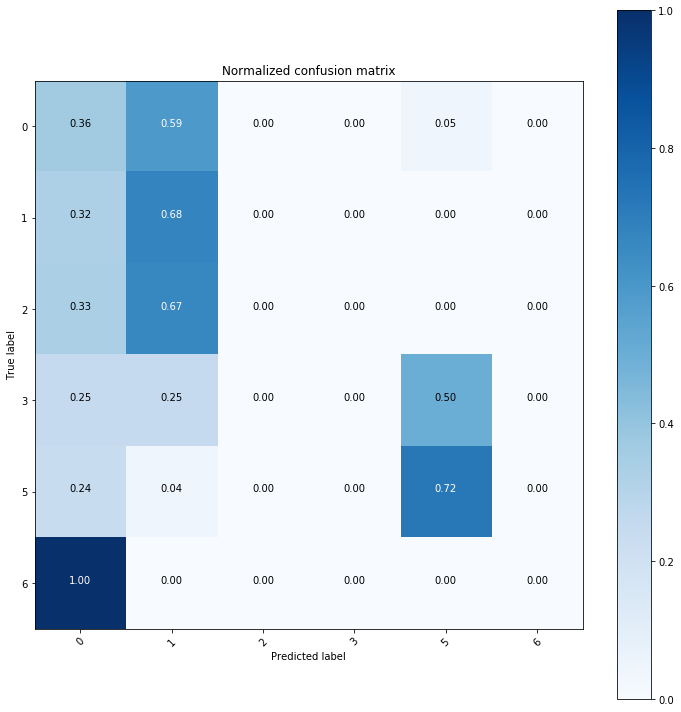

predicting 2 performance


100%|██████████| 361/361 [01:43<00:00,  3.50it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.2625     0.70833333 0.         0.         0.02916667 0.        ]
 [0.19480519 0.80519481 0.         0.         0.         0.        ]
 [0.33333333 0.66666667 0.         0.         0.         0.        ]
 [0.25       0.75       0.         0.         0.         0.        ]
 [0.04       0.04       0.         0.         0.92       0.        ]
 [1.         0.         0.         0.         0.         0.        ]]


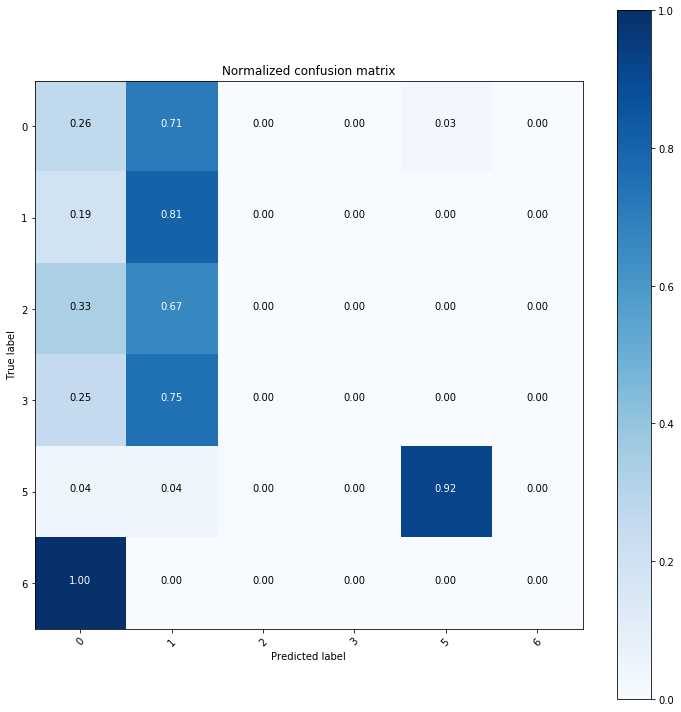

predicting 3 performance


100%|██████████| 361/361 [01:43<00:00,  3.48it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.99583333 0.00416667 0.         0.         0.         0.        ]
 [0.06493506 0.93506494 0.         0.         0.         0.        ]
 [0.         0.         1.         0.         0.         0.        ]
 [0.         0.         0.         1.         0.         0.        ]
 [0.         0.         0.         0.         1.         0.        ]
 [0.         0.         0.         0.         0.         1.        ]]


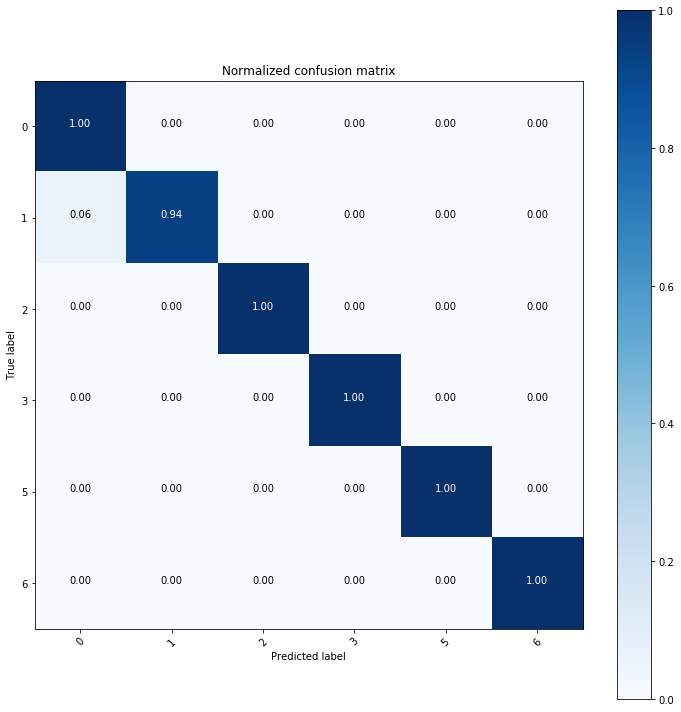

In [10]:
for od in range(len(pfs)):
    print('predicting %d performance' % (od + 1))
    pred_y, y = model.predict(pfs[od])
    
    print('============ prediction arm ============')
    cutstom_output_cnf_matrix(y, pred_y)